In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani

In [2]:
#######################
#
#1-D wave equation with drag and stiffness
#
#   d^2y        dy       [  d^2y                d^4 y]
#   ---- = -2b --- + c^2 [  ----  - epsilon*L^2  -----]
#   dt^2        dt       [  dx^2                dx^4 ]
#
# where y = y(x,t) is the wave displacement and c is the wave speed.
# 


In [213]:
###Function definitions
#constants
N=1000; L=1.9;t0=0.0;tf=4.0;nt=100000; 
dt=(tf-t0)/nt
x=np.arange(0,L,(L/N))
dx=x[1]-x[0]
c=120.0
eps=.5e-7
C=c*dt/dx**2
s= -C*eps*(dx/dt)**2

w0 = c/(2*L);w=L/10;amp = .1

#RK4:
b= -2*.5
def deriv(u,v):
    return(np.array([v,(v*b)+(-c**2)*((u)*C)]))

print(C)

1329.639889196676


\begin{equation}
    \frac{\partial^4 y}{\partial x^4} = \frac{y(x-2dx)-4y(x-dx)+6y(x)-4y(x+dx)+y(x+2dx)}{dx^4}
\end{equation}

[0.         0.00475282 0.00028287 0.         0.         0.        ]


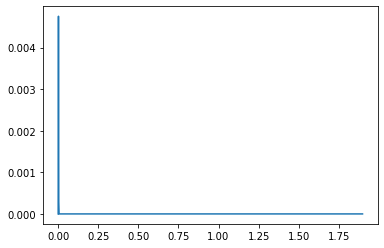

<ipython-input-214-15325b694043>:18: RuntimeWarning: overflow encountered in multiply
  u0[1:-1], u[1:-1] = u[1:-1], -b*u[1:-1]-u0[1:-1]+(C*(u0[2:]+u0[:-2]-2*u0[1:-1]))
<ipython-input-214-15325b694043>:18: RuntimeWarning: invalid value encountered in subtract
  u0[1:-1], u[1:-1] = u[1:-1], -b*u[1:-1]-u0[1:-1]+(C*(u0[2:]+u0[:-2]-2*u0[1:-1]))
<ipython-input-214-15325b694043>:18: RuntimeWarning: overflow encountered in add
  u0[1:-1], u[1:-1] = u[1:-1], -b*u[1:-1]-u0[1:-1]+(C*(u0[2:]+u0[:-2]-2*u0[1:-1]))
<ipython-input-214-15325b694043>:18: RuntimeWarning: overflow encountered in subtract
  u0[1:-1], u[1:-1] = u[1:-1], -b*u[1:-1]-u0[1:-1]+(C*(u0[2:]+u0[:-2]-2*u0[1:-1]))
<ipython-input-214-15325b694043>:18: RuntimeWarning: invalid value encountered in add
  u0[1:-1], u[1:-1] = u[1:-1], -b*u[1:-1]-u0[1:-1]+(C*(u0[2:]+u0[:-2]-2*u0[1:-1]))


[-0.00814202         nan         nan         nan         nan         nan]


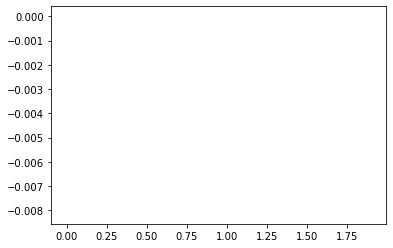

[0.01622997        nan        nan        nan        nan        nan]


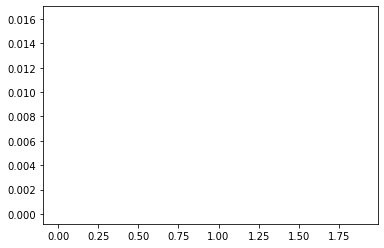

[0.03202957        nan        nan        nan        nan        nan]


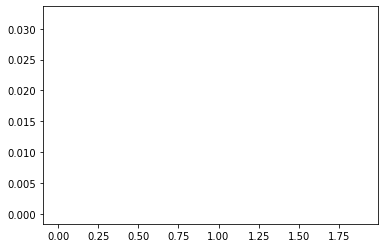

In [214]:


u=np.zeros(N,float)
u0=u.copy()
v=0.0*u

a=.1
drivef=w0/2
u[0]=a*np.sin(dt);u[-1]=0; u[-1]=0;  v[0]=0;v[-1]=0
v[1:-1]+=C*(u[2:]+u[0:-2]-2*u[1:-1])
u[1:-1]+=dt*v[1:-1]

u0=u.copy()



#leapfrog
for i in np.arange(0.0,tf+dt,dt):
    u[0]=a*np.sin(drivef*i)
    u0[1:-1], u[1:-1] = u[1:-1], -b*u[1:-1]-u0[1:-1]+(C*(u0[2:]+u0[:-2]-2*u0[1:-1]))
    u0[0]=u[0];
    if i in [0.0,1.0,2.0,3.0,4.0]:
        print(u[0:6])
        plt.plot(x,u)
        plt.show()
#     if i in [0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]:
#         plt.plot(x,u)
plt.show()

In [46]:
-1.380115509216919e+307/-7.369980146986926e+305

18.726176756136212

In [274]:
9.86481904650816e+306/1.6374411350751758e+307

0.6024533545173983

In [217]:

# Set the intial conditions, find the initial g and integrate in time

t0 = 0; t1= 2.0; nt = 200000; dt = (t1 - t0)/nt 
epsilon= 7.5e-6

# introduce the diffusion term
b = .5
D= -2*b

#to vary initial position change p value 0-1 as a decimal percent between the two edges
#to vary height change amp to desired amplitude value
p=.35;amp=.1

# u = ureset(N,p,amp); g = u.copy();
# plt.plot(x,u)
# plt.xlabel(r'$x$'); plt.ylabel(r'$u$'); plt.title('The initial pluck position for reference')
# plt.show()



# v = 0.0*g
# kx2= (2*np.pi*(np.arange(N) + 1)/(2*L))**2
# kx4=kx2**2
# print(kx2[5])
# #derivative function
# def deriv(g,v):
#     return(np.array([v,(v*D)+(-c**2)*((kx2*g)-((epsilon*L**2)*kx4*g))]))


# for t in np.arange(t0,t1+dt,dt):  # Using 4th-order Runge-Kutta
    
#     k1 = dt*deriv(g,v)
#     k2 = dt*deriv(g+0.5*k1[0,:],v+0.5*k1[1,:])
#     k3 = dt*deriv(g+0.5*k2[0,:],v+0.5*k2[1,:])
#     k4 = dt*deriv(g+k3[0,:],v+k3[1,:])
#     step = (k1 + 2*k2 + 2*k3 + k4)/6
#     g += step[0,:]; v += step[1,:]

#     if np.abs(t-0.04) < dt/2 or np.abs(t-0.08) < dt/2 or np.abs(t-0.12) < dt/2 or \
#        np.abs(t-0.16) < dt/2 or np.abs(t-0.20) < dt/2:
# #         print('Plotting at t=',t)
#         u = fftsinei(g,x)
#         plt.plot(x,g)
    

# #     if np.abs(t-1.95) < dt/2 or np.abs(t-1.96) < dt/2 or np.abs(t-1.97) < dt/2 or \
# #        np.abs(t-1.98) < dt/2 or np.abs(t-1.99) < dt/2 or np.abs(t-2.0) < dt/2:
# # #         print('Plotting at t=',t)
# #         u2 = fftsinei(g,x)
# #         plt.plot(x,u2)      


# plt.axis([0,L,-0.12,0.12])
# plt.xlabel(r'$x$'); plt.ylabel(r'$u$'); plt.title('6 evenly spaced interval in the first .2 seconds')
# plt.show() 
